<B>Data Science Stages<B>:

1. Hypothesis

2. Exploratory Data Analysis

3. Data Cleaning

4. Feature Engineering

5. Model Creation

<B>Problem Statement</B>

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

<B>Hypothesis</B>
    
Think about your problem before starting anything.

Some of the things may be:

a. Stores that are big in size may result in higher sales

b. Stores having other stores will have less sales because of competition

c. Stores near residential locations will have more sales.

d. Stores having cleaner surroundings and good maintenance will attract customers.

e. Stores with good marketing will have higher sales.

f. Branded products will be more sold.

g. Products with more visibility will be sold frequently.

h. Products with good advertisements will be more popular.

i. Products with discounts will be sold more.

j. Products which are used daily will be sold more.

k. Products' price will play a role in Sales.


<B>Data Exploration</B>

Variables Available:

Item_Identifier: Unique product ID. 

Item_Weight: Weight of product. We have thought nothing about it in our hypothesis. It may not affect the sales.

Item_Fat_Content: Whether the product is low fat or not. It may affect the sales since people are generally concerned about fat content in the products

Item_Visibility: The % of total display area of all products in a store allocated to the particular product. We have considered it in our hypothesis

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established.

Outlet_Size: The size of the store in terms of ground area covered.

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.


In [195]:
import pandas as pd
import numpy as np
import matplotlib
% matplotlib inline
matplotlib.style.use('ggplot')

train = pd.read_csv("C://Work//GDrive//Online Course to Teach//Python//Data Analytics with Python//Sessions//Projects//Big Mart Sales//train.csv")

In [196]:
train.shape

(8523, 12)

In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [198]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [234]:
#Check for missing values

train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Fat_Content_0              0
Item_Fat_Content_1              0
Item_Fat_Content_2              0
Item_Type_Combined_0            0
Item_Type_Combined_1            0
Item_Type_Combined_2            0
Outlet_Size_0                   0
Outlet_Size_1                   0
Outlet_Size_2                   0
dtype: int64

In [200]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Visibility is 0 in some cases which does not make sense. Store Establishment year may be helpful if we convert it to how old a store is. (Current Year - Establishment Year)

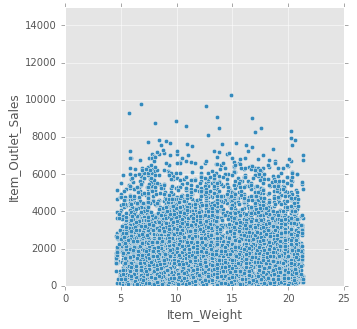

In [201]:
train.plot(kind="scatter",     # Create a scatterplot
              x="Item_Weight",          # Put weight on the x axis
              y="Item_Outlet_Sales",          # Put sales on the y axis
              figsize=(5,5),
              ylim=(0,15000))

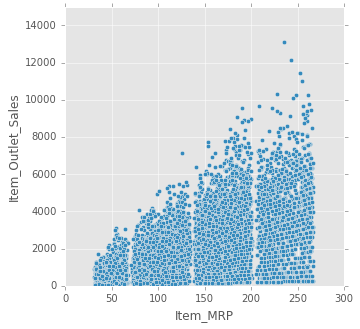

In [202]:
train.plot(kind="scatter",     # Create a scatterplot
              x="Item_MRP",          # Put MRP on the x axis
              y="Item_Outlet_Sales",          # Put sales on the y axis
              figsize=(5,5),
              ylim=(0,15000))

Visibility is 0 in some cases which does not make sense.
Store Establishment year may be helpful if we convert it to how old a store is. (Current Year - Establishment Year)

In [203]:
#categorical variables:

categorical = train.dtypes[train.dtypes == "object"].index

print(categorical)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [204]:
train[categorical].describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [205]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [206]:
#Some of the categories may be combined.

In [207]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [208]:
#low fat, Low Fat, LF seems to be same. Regular,reg seems to be same

In [209]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [210]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [211]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [212]:
#baseline Model

#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

print(mean_sales)

2181.2889135750365


In [213]:
SSE=0
for i in train['Item_Outlet_Sales']:
    SSE = SSE + (mean_sales - i)**2
RMSE = (SSE/float(train.shape[0]))**0.5

print(RMSE)

1706.39950136


In [214]:
#Sales by Outlet Size

groupby_size = train['Item_Outlet_Sales'].groupby(train['Outlet_Size']) 

In [215]:
groupby_size.mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

#predictors = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]
predictors = train.loc[:,['Item_MRP']]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)
lreg.score(predictors, to_predict)

print('Coefficient: \n', lreg.coef_)
print('Intercept: \n', lreg.intercept_)

train_prediction = lreg.predict(X = predictors)
RMSE = mean_squared_error(train_prediction, train["Item_Outlet_Sales"])**0.5

print('RMSE: \n',RMSE)
print('R-Squared: \n',lreg.score(predictors, to_predict))

Coefficient: 
 [ 15.55302354]
Intercept: 
 -11.5751428252
RMSE: 
 1404.91638686
R-Squared: 
 0.322140752498


In [217]:
# Impute Missing values

train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

In [218]:
#Create a new variable

train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

predictors = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Visibility']]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)
lreg.score(predictors, to_predict)

print('Coefficient: \n', lreg.coef_)
print('Intercept: \n', lreg.intercept_)

train_prediction = lreg.predict(X = predictors)
RMSE = mean_squared_error(train_prediction, train["Item_Outlet_Sales"])**0.5

print('RMSE: \n',RMSE)
print('R-Squared: \n',lreg.score(predictors, to_predict))

Coefficient: 
 [   12.76921763    15.54203289 -4763.74286586]
Intercept: 
 130.76780293
RMSE: 
 1382.8761924
R-Squared: 
 0.343242306931


In [220]:
train['Outlet_Size'].fillna('Small',inplace=True)

In [221]:
train["Outlet_Size"][train["Outlet_Size"] == "Small"] = 0
train["Outlet_Size"][train["Outlet_Size"] == "Medium"] = 1
train["Outlet_Size"][train["Outlet_Size"] == "High"] = 2

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [222]:
train['Outlet_Size'].value_counts()

0    4798
1    2793
2     932
Name: Outlet_Size, dtype: int64

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

predictors = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Visibility','Outlet_Size']]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)
lreg.score(predictors, to_predict)

print('Coefficient: \n', lreg.coef_)
print('Intercept: \n', lreg.intercept_)

train_prediction = lreg.predict(X = predictors)
RMSE = mean_squared_error(train_prediction, train["Item_Outlet_Sales"])**0.5

print('RMSE: \n',RMSE)
print('R-Squared: \n',lreg.score(predictors, to_predict))

Coefficient: 
 [ -8.97427125e-01   1.55394041e+01  -4.05455703e+03   3.84292910e+02]
Intercept: 
 78.6624701974
RMSE: 
 1362.75824659
R-Squared: 
 0.362212201479


In [224]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [225]:
#Get the first two characters of ID:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [226]:
#Mark non-consumables as separate category in low_fat:
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [227]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Item_Type_Combined']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [228]:
train['Item_Fat_Content'].value_counts()

0    3918
2    3006
1    1599
Name: Item_Fat_Content, dtype: int64

In [229]:
train['Item_Type_Combined'].value_counts()

1    6125
2    1599
0     799
Name: Item_Type_Combined, dtype: int64

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

predictors_list=['Outlet_Establishment_Year','Item_MRP','Item_Visibility','Outlet_Size',
                  'Item_Type_Combined','Item_Fat_Content']
predictors = train.loc[:,predictors_list]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)
lreg.score(predictors, to_predict)

print('Coefficient: \n', lreg.coef_)
print('Intercept: \n', lreg.intercept_)

train_prediction = lreg.predict(X = predictors)
RMSE = mean_squared_error(train_prediction, train["Item_Outlet_Sales"])**0.5

print('RMSE: \n',RMSE)
print('R-Squared: \n',lreg.score(predictors, to_predict))

Coefficient: 
 [ -8.24492347e-01   1.55495825e+01  -4.09447156e+03   3.83652928e+02
  -5.14603621e+01   3.01939532e+01]
Intercept: 
 108.600877253
RMSE: 
 1362.32633258
R-Squared: 
 0.362616419661


In [231]:
#One Hot Coding:
train = pd.get_dummies(train, columns=['Item_Fat_Content','Item_Type_Combined','Outlet_Size'])


In [232]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
dtype: object

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

predictors_list=['Outlet_Establishment_Year','Item_MRP','Item_Visibility',
                  'Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2',
                  'Item_Type_Combined_0','Item_Type_Combined_1','Item_Type_Combined_2','Outlet_Size_0',
                  'Outlet_Size_1','Outlet_Size_2']
predictors = train.loc[:,predictors_list]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)
lreg.score(predictors, to_predict)

print('Coefficient: \n', lreg.coef_)
print('Intercept: \n', lreg.intercept_)

train_prediction = lreg.predict(X = predictors)
RMSE = mean_squared_error(train_prediction, train["Item_Outlet_Sales"])**0.5

print('RMSE: \n',RMSE)
print('R-Squared: \n',lreg.score(predictors, to_predict))

Coefficient: 
 [  6.74443238e+00   1.55556587e+01  -4.04854958e+03  -1.07613386e+01
  -2.67747155e+01   3.75360541e+01  -2.15762028e+00   2.89323358e+01
  -2.67747155e+01  -3.53403526e+02   4.10262694e+02  -5.68591678e+01]
Intercept: 
 221.901636678
RMSE: 
 1338.99848534
R-Squared: 
 0.384258053271


In [241]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [242]:
le = LabelEncoder()
#New variable for outlet
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])

In [245]:
train = pd.get_dummies(train, columns=['Outlet'])

In [246]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
Outlet_4                       uint8
Outlet_5                       uint8
Outlet_6                       uint8
Outlet_7                       uint8
O

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

predictors_list=['Outlet_Establishment_Year','Item_MRP','Item_Visibility',
                  'Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2',
                  'Item_Type_Combined_0','Item_Type_Combined_1','Item_Type_Combined_2','Outlet_Size_0',
                  'Outlet_Size_1','Outlet_Size_2','Outlet_0','Outlet_1','Outlet_2','Outlet_3',
                   'Outlet_4','Outlet_5','Outlet_6','Outlet_7','Outlet_8','Outlet_9']
predictors = train.loc[:,predictors_list]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)
lreg.score(predictors, to_predict)

print('Coefficient: \n', lreg.coef_)
print('Intercept: \n', lreg.intercept_)

train_prediction = lreg.predict(X = predictors)
RMSE = mean_squared_error(train_prediction, train["Item_Outlet_Sales"])**0.5

print('RMSE: \n',RMSE)
print('R-Squared: \n',lreg.score(predictors, to_predict))

Coefficient: 
 [ -1.03208564e+01   1.55552782e+01  -2.35321565e+02  -1.40504400e+01
  -1.36075836e+01   2.76580236e+01  -1.30080843e+00   1.49083921e+01
  -1.36075836e+01  -4.70842034e+02   3.67302591e+02   1.03539443e+02
  -1.37530421e+03   1.03539443e+02   5.44149467e+02  -6.94832323e+02
  -1.22337848e+03   1.27995098e+03   6.15877769e+02   4.24174087e+02
   5.43639334e+02  -2.17816067e+02]
Intercept: 
 166.920426105
RMSE: 
 1127.41302693
R-Squared: 
 0.563479477611


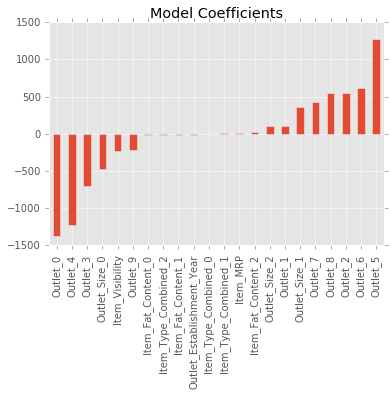

In [257]:
coef1 = pd.Series(lreg.coef_, predictors_list).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')